<center><font size = "8">Load, visualize and analyze two neuronal morphologies<center>

<font size=5><font color=blue> In this notebook you will learn to differenciate two neurons by analysing some of their morphological characteristics

<p style="color: red; font-size: 16px;"><b>IMPORTANT:</b> this notebook is using <b>Python</b> code to help you load, visualize and analyze the morphologies.</p>
<ul style="color: red; font-size: 16px;">
  <li><b>YOU DON'T NEED TO KNOW HOW TO CODE!</b> (you will learn to code in future courses)</li>
  <li>YOU WOULD ONLY RUN THE CELLS. To run the cells: </li>
    <ul style="color: red; font-size: 16px;">
        <li>Click once on one of the cells, you will notice that it is sellected because it is highlighted in blue.</li>
        <li>Press "Command+enter" or click on the Run (triangle) button at the top of the page.</li>
        <li>Consider that cells <b>must be run by order</b> </li>
    </ul>
</ul>

<p style="color: green; font-size: 16px;"><b>YOUR GOAL:</b></p>
<ul style="color: green; font-size: 16px;">
  <li>to identify the differences between the neurons understanding and using the analyses below</li>
</ul>

# Let's start!

In [3]:
# This cell loads the python packages necessary to run the following code

import neurom as nm
from neurom import view
from neurom.core.morphology import iter_neurites, iter_sections
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)  # from NeuroM we import utils function to adjust the plot limits
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and visualize 

In [5]:
# Here are the paths to the morphology files that you can find in the "data" folder on the left
# Compatible file formats for morphology could be: ascii, swc, hdf5
path_to_file_01 = "data/ch150801A1.asc"
path_to_file_02 = "data/rp110202_L5-2_idA.asc"

# Define nicer names for the neurons
nrn_01 = path_to_file_01
nrn_02 = path_to_file_02

# Load neurons, so the code can use the neuron files
neuron_01 = nm.load_morphology(nrn_01)
neuron_02 = nm.load_morphology(nrn_02)

### Visualization
You will notice that the soma and the different neurites (basal dendrite, apical dendrite and axon) are plotted in different colors
* soma: black
* basal dendrites: red
* apical dendrites: purple
* axon: blue

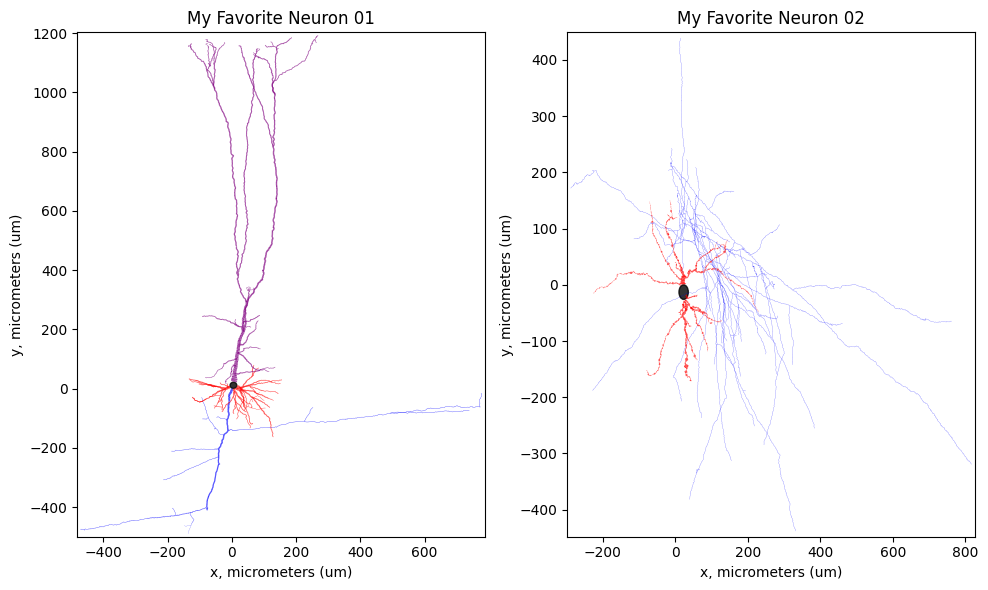

In [6]:
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# plot neuron_01
view.plot_morph(neuron_01, plane="xy", ax=ax1)
update_plot_limits(ax1, white_space=10)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax1.set_title("My Favorite Neuron 01")
ax1.set_xlabel("x, micrometers (um)")
ax1.set_ylabel("y, micrometers (um)");


# plot neuron_02
view.plot_morph(neuron_02, plane="xy", ax=ax2)
update_plot_limits(ax2, white_space=10)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax2.set_title("My Favorite Neuron 02")
ax2.set_xlabel("x, micrometers (um)")
ax2.set_ylabel("y, micrometers (um)");

plt.tight_layout()
plt.show()

We can also plot the different neurites separately

__Neurite:__ general term for any projection from the cell body of a neuron (axon or dendrite).

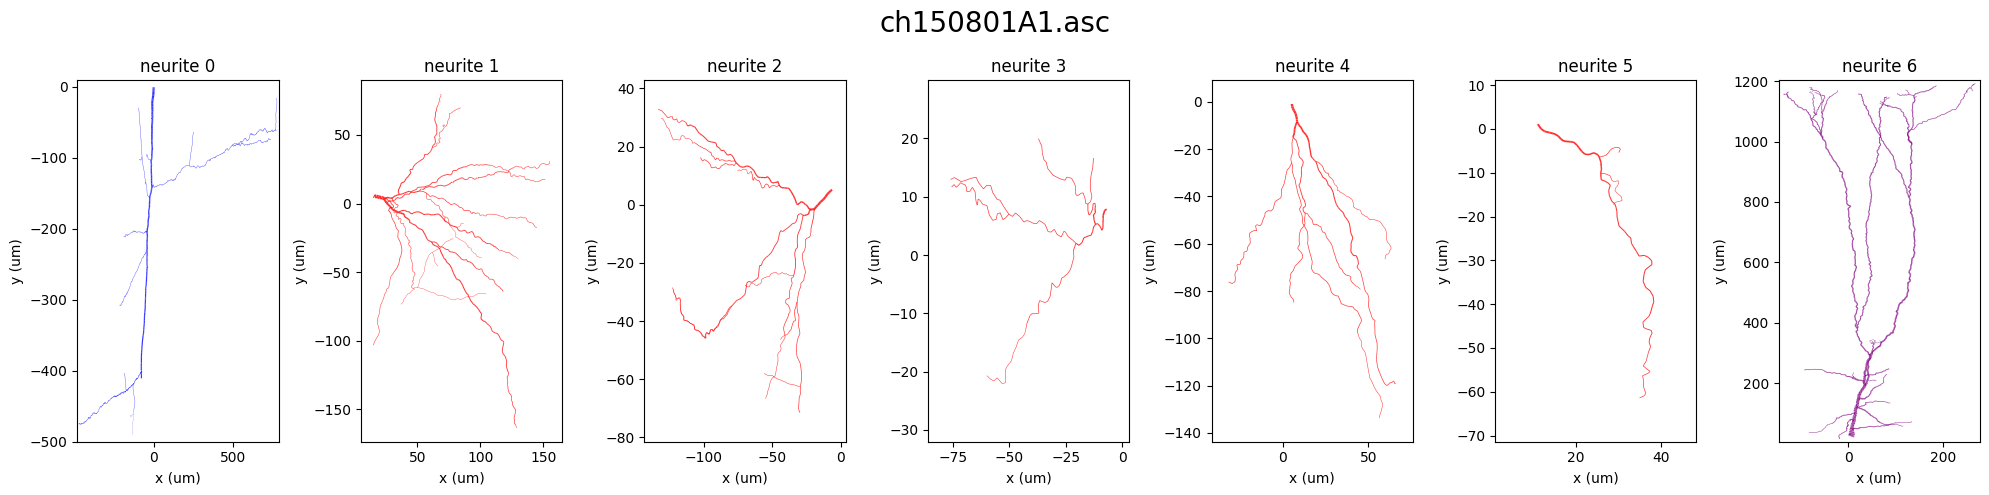

In [10]:
neurites_01 = neuron_01.neurites

# Plot each of the neurites separately for neuron_01
N = len(neurites_01)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites_01):
    current_axes = axes[i]
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.matplotlib_impl.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neurite {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle(neuron_01.name, fontsize=20);
plt.tight_layout()

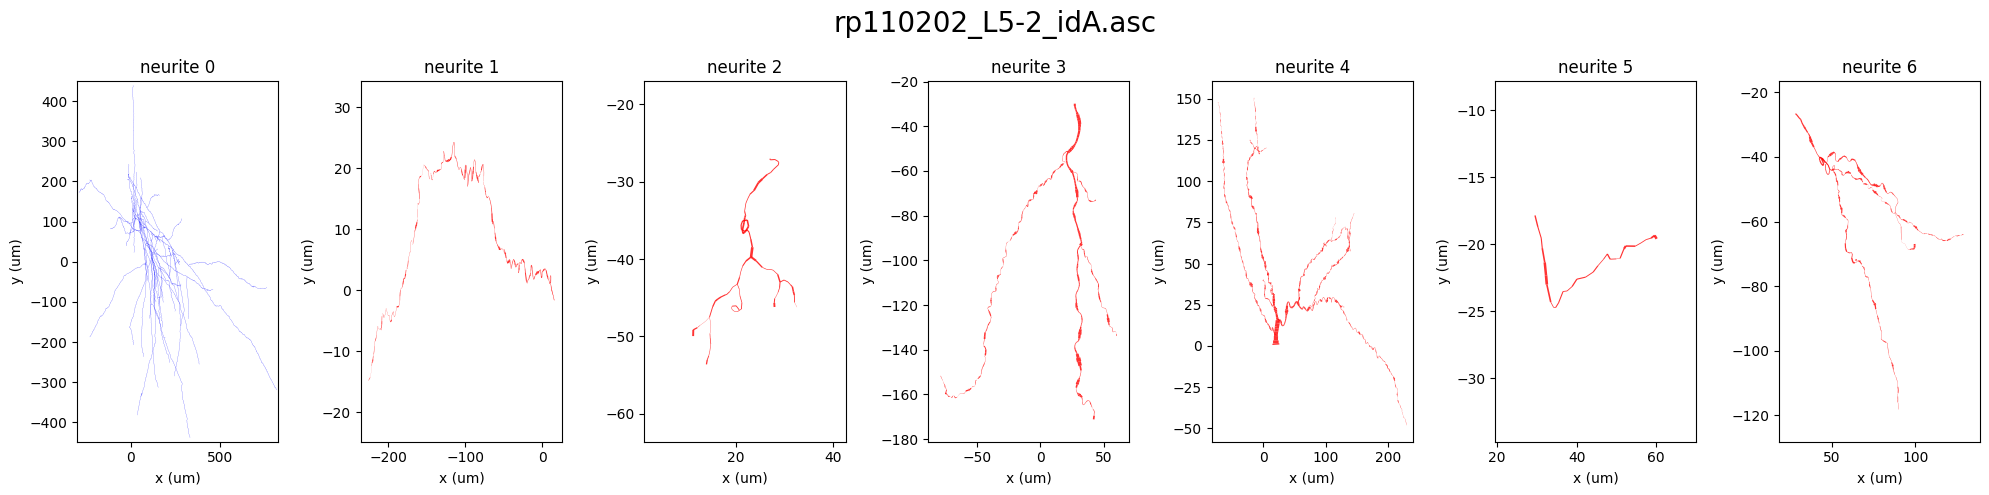

In [12]:
neurites_02 = neuron_02.neurites

# Plot each of the neurites separately for neuron_02
N = len(neurites_02)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites_02):
    current_axes = axes[i]
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.matplotlib_impl.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neurite {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle(neuron_02.name, fontsize=20);
plt.tight_layout()

### Dendrogram of a neuron:

hierarchical tree diagram that illustrates the structural relationships and complexity of a neuron's dendritic arbor

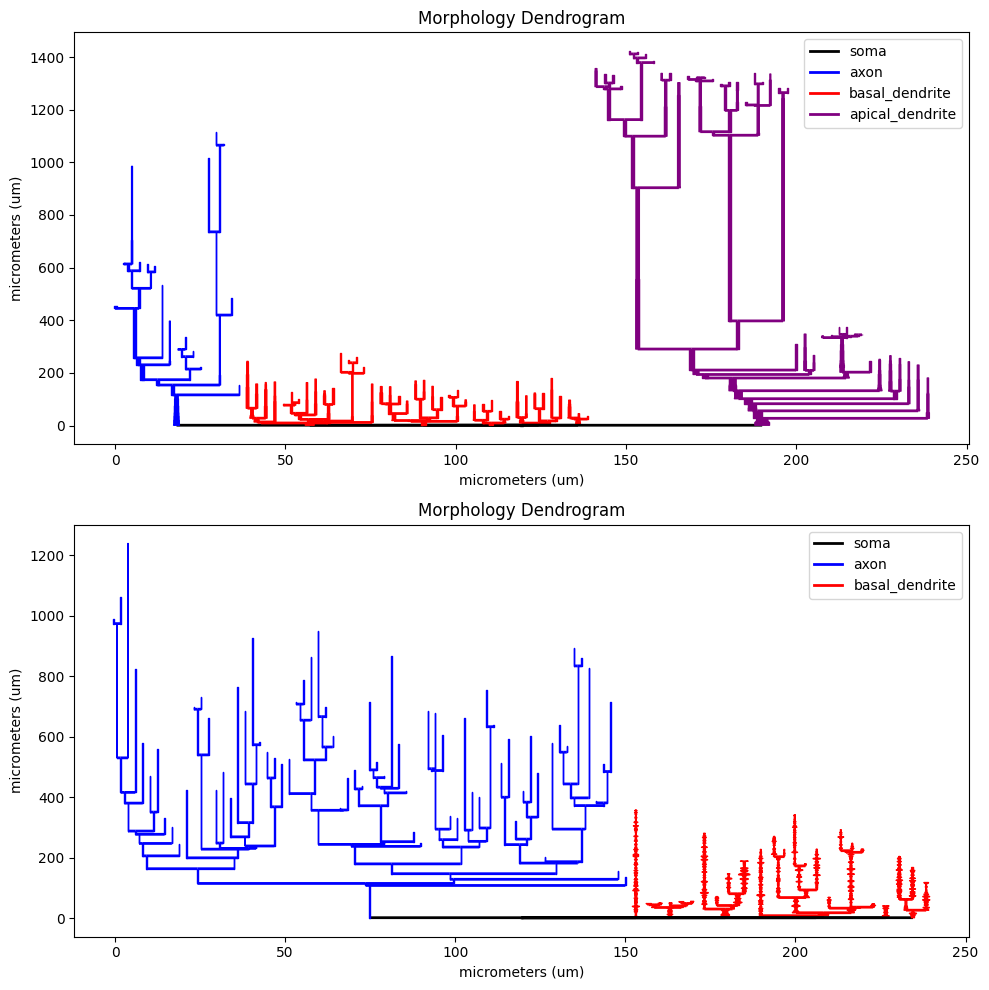

In [13]:
# Here we can create a dendrogram of our loaded morphologies - showing us the
# hierarchical relationship of neurons axon, basal and apical dendrite

# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot dendogram of neuron_01
view.plot_dendrogram(neuron_01, ax=ax1)

# plot dendogram of neuron_02
view.plot_dendrogram(neuron_02, ax=ax2)

plt.tight_layout()
plt.show()

# 2. Morphometrics: analysis

#### Soma radius

In [17]:
soma_radius_01 = nm.get("soma_radius", neuron_01)
soma_radius_02 = nm.get("soma_radius", neuron_02)

print('soma radious neuron_01:', soma_radius_01, 'µm')
print('soma radious neuron_02:', soma_radius_02, 'µm')

soma radious neuron_01: 10.497238159179688 µm
soma radious neuron_02: 12.922274589538574 µm


#### Neurite volume density

In [26]:
Neurite_vol_dens_01 = nm.get("neurite_volume_density", neuron_01)
Neurite_vol_dens_02 = nm.get("neurite_volume_density", neuron_02)

print('mean neurite volume density neuron_01:', np.mean(Neurite_vol_dens_01), 'neurite/mm3')
print('mean neurite volume density neuron_02:', np.mean(Neurite_vol_dens_02), 'neurite/mm3')

mean neurite volume density neuron_01: 0.0034262783193703557 µm
mean neurite volume density neuron_02: 0.03312870644812513 µm


#### Maximum radial distance

In [24]:
Max_rad_dist_01 = nm.get("max_radial_distance", neuron_01)
Max_rad_dist_02 = nm.get("max_radial_distance", neuron_02)

print('maximum radial distance neuron_01:', Max_rad_dist_01, 'µm')
print('maximum radial distance neuron_02:', Max_rad_dist_02, 'µm')

maximum radial distance neuron_01: 1210.74609375 µm
maximum radial distance neuron_02: 850.7958984375 µm


#### Total height

In [25]:
Total_h_01 = nm.get("total_height", neuron_01)
Total_h_02 = nm.get("total_height", neuron_02)

print('total height neuron_01:', Total_h_01, 'µm')
print('total height neuron_02:', Total_h_02, 'µm')

total height neuron_01: 1682.739990234375 µm
total height neuron_02: 877.1500244140625 µm


#### PLot the results

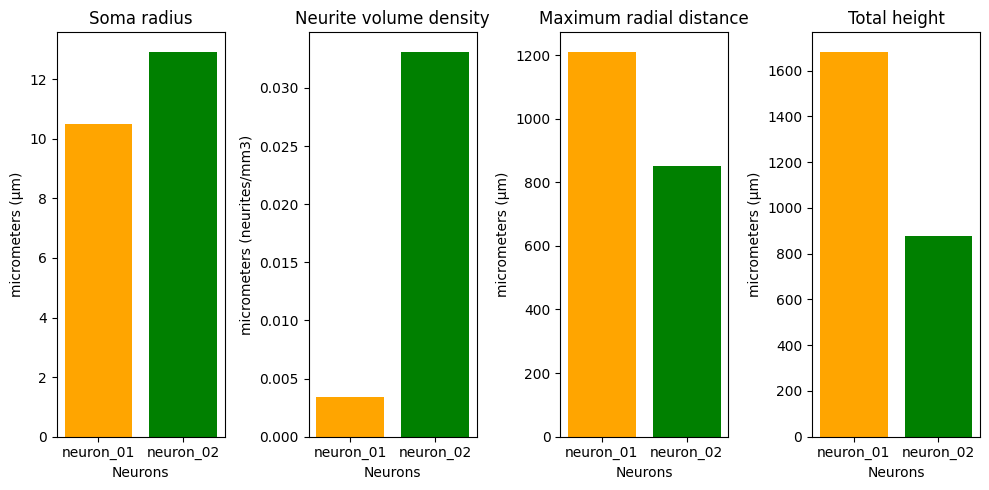

In [30]:
# Create a figure with 1 row and 4 columns of subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))

neurons = ['neuron_01', 'neuron_02']
colors = ['orange', 'green']

# soma radius
soma_radius = [soma_radius_01, soma_radius_02]
ax1.bar(neurons, soma_radius, color=colors)

ax1.set_title("Soma radius")
ax1.set_xlabel("Neurons")
ax1.set_ylabel("micrometers (µm)");


# Neurite volume density
neurite_vol_dens = [np.mean(Neurite_vol_dens_01), np.mean(Neurite_vol_dens_02)]
ax2.bar(neurons, neurite_vol_dens, color=colors)

ax2.set_title("Neurite volume density")
ax2.set_xlabel("Neurons")
ax2.set_ylabel("micrometers (neurites/mm3)");

# Maximum radial distance
max_rad_dist = [Max_rad_dist_01, Max_rad_dist_02]
ax3.bar(neurons, max_rad_dist, color=colors)

ax3.set_title("Maximum radial distance")
ax3.set_xlabel("Neurons")
ax3.set_ylabel("micrometers (µm)");

# Total height
total_h = [Total_h_01,Total_h_02]
ax4.bar(neurons, total_h, color=colors)

ax4.set_title("Total height")
ax4.set_xlabel("Neurons")
ax4.set_ylabel("micrometers (µm)");

plt.tight_layout()
plt.show()

## Questions

Considering what you have seen in the lecture:
 1. which neuron is an excitatory pyramidal neuron and which is an inhibitory neuron?
 2. Justify your answer by describing in your own words the differences observed.